# Pymaceuticals Inc.
---

### Analysis

-On average, Capomulin will not stop the growth of tumor with mice's weight increase.
 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_number = mouse_study_merge['Mouse ID'].nunique()
mouse_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_merge.duplicated(subset=['Mouse ID','Timepoint'])
mouse_study_merge.loc[mouse_study_merge.duplicated(subset=['Mouse ID','Timepoint']),['Mouse ID']]

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_merge.loc[mouse_study_merge['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_merge.drop(mouse_study_merge[mouse_study_merge['Mouse ID'] == 'g989'].index)
mouse_study_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_number = mouse_study_cleaned['Mouse ID'].nunique()
mouse_number

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_Tumor =  mouse_study_cleaned.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_Tumor = mouse_study_cleaned.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_variance = mouse_study_cleaned.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_SEV = mouse_study_cleaned.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_SEM = mouse_study_cleaned.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({'Mean Tumor Volume': mean_Tumor,
                                'Median Tumor Volume':median_Tumor,
                                'Tumor Volume Variance':tumor_variance,
                                'Tumor Volume Std. Dev.':tumor_SEV,
                                'Tumor Volume Std. Err.':tumor_SEM })
regimen_summary                               

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

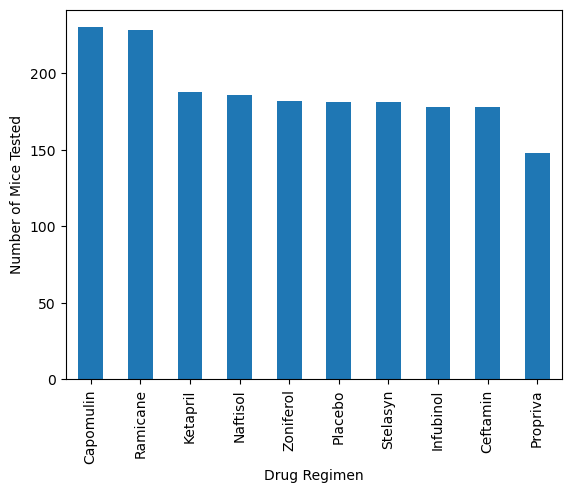

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
num_counts= mouse_study_cleaned['Drug Regimen'].value_counts()
num_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel="Number of Mice Tested")

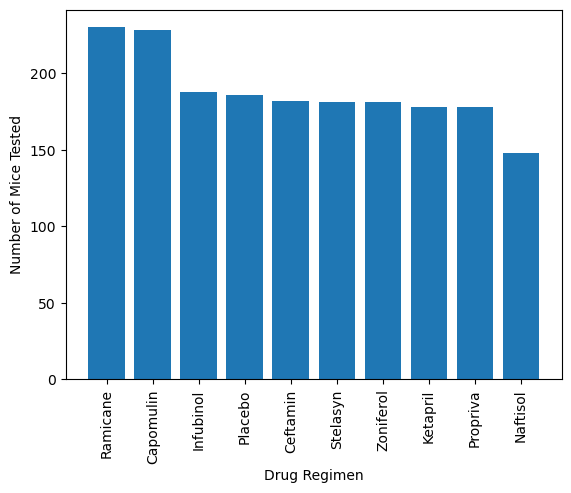

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_cleaned['Drug Regimen'].unique()
tick_locations = [value for value in x_axis]
plt.bar(x_axis,mouse_study_cleaned['Drug Regimen'].value_counts())
plt.xticks(tick_locations,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [19]:
all_mouse = mouse_metadata.drop(mouse_metadata[mouse_metadata['Mouse ID'] == 'g989'].index) 
all_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


Text(0, 0.5, 'Sex')

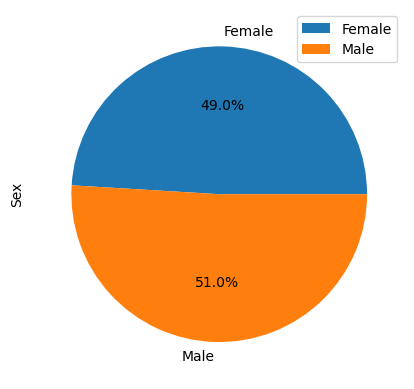

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie = mouse_study_cleaned.groupby(['Sex']).count().plot(kind='pie',y='Mouse ID',autopct='%1.1f%%')
sex_pie.set_ylabel('Sex')

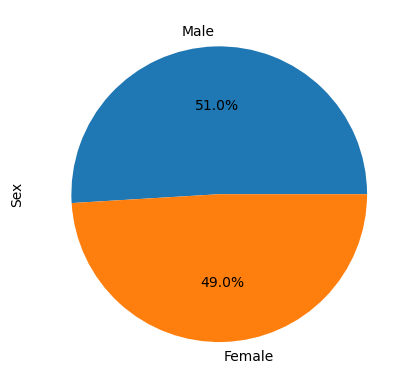

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mouse_study_cleaned.value_counts(['Sex'])
label = 'Male', 'Female'
plt.pie(sex, labels=label, autopct="%1.1f%%")
plt.ylabel('Sex', loc='center')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_maxtimepoint = mouse_study_cleaned.groupby(['Mouse ID'])['Timepoint'].max()
mouse_maxtimepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_mt= pd.merge(mouse_study_cleaned, mouse_maxtimepoint, on=['Mouse ID','Timepoint'], how='right')
mouse_mt

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin = mouse_mt.loc[mouse_mt['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
Ramicane = mouse_mt.loc[mouse_mt['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)']
Infubinol = mouse_mt.loc[mouse_mt['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
Ceftamin = mouse_mt.loc[mouse_mt['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']
treatments = [Capomulin,Ramicane,Infubinol,Ceftamin]

In [29]:
# Create empty list to fill with tumor vol data (for plotting)
outlier =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.(start a for loop through the list of treatments)
for i in treatments: #i=Series
    i_quartiles = i.quantile([.25,.5,.75])
    i_lowerq = i_quartiles[0.25]
    i_upperq = i_quartiles[0.75]
    i_iqr = i_upperq-i_lowerq
    i_lower_bound = i_lowerq - (1.5*i_iqr)
    i_upper_bound = i_upperq + (1.5*i_iqr)    
    # Determine outliers using upper and lower bounds (calc the outliers based on the series from the 1st part)
    for x in i:
        if (x > i_upper_bound) or( x < i_lower_bound):
            outlier.append(x)
print(outlier)     

[36.3213458]


C:\Users\ngao\AppData\Local\Temp\ipykernel_14260\677940206.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(('Capomulin','Ramicane','Infubinol','Ceftamin'))


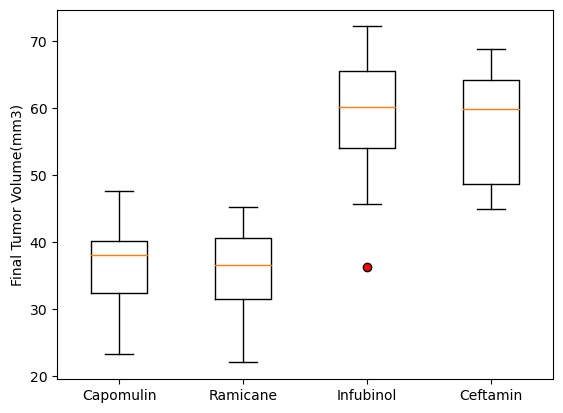

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.set_xticklabels(('Capomulin','Ramicane','Infubinol','Ceftamin'))
ax1.boxplot(treatments, flierprops={'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter out mouse l509 data
mouse_l509 = study_results.loc[study_results['Mouse ID']=='l509']
mouse_l509

In [ ]:
# Identify x and y axises
x_axis = mouse_l509['Timepoint']
y_axis = mouse_l509['Tumor Volume (mm3)']

# Plot the line
plt.plot(x_axis, y_axis, color='blue')

# set labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

In [ ]:
# filter out treatment Capomulin data
Capomulin_study = mouse_study_cleaned.loc[mouse_study_cleaned['Drug Regimen']=='Capomulin']
Capomulin_study

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Identify x and y axises
x_axis1 = Capomulin_study.groupby(['Mouse ID']).mean()['Weight (g)']
y_axis1 = Capomulin_study.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

#Plot the line
plt.scatter(x_axis1, y_axis1 ,marker="o")

#set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis1,y_axis1)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

In [ ]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis1, y_axis1)
p_fit = p_slope * x_axis1 + p_int

#Plot the line
plt.scatter(x_axis1, y_axis1 ,marker="o")
plt.plot(x_axis1,p_fit,"--", color='red')

#set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()